
# TRABALHANDO COM DADOS NÃO ESTRUTURADOS


# Batalha estatística das bandas de Heavy Metal

Vamos mostrar como podemos trabalhar com dados não estruturados utilizando plataformas opensource

<img src='https://static.independent.co.uk/s3fs-public/styles/story_large/public/thumbnails/image/2015/12/29/10/motorhead.jpg?raw=true'></img>

Este exemplo será consttruído utilizandoa linguagem R compilada em um notebook Jupyter instanciado em um ambiente Spark

#                                                                                                    X

<img src='https://i1.wp.com/www.imprensadorock.com.br/wp-content/uploads/2016/05/iron-maiden.jpg?raw=true'></img>


INSTALANDO PACOTES

In [1]:
install.packages("SnowballC")

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/s62f-ac927fd26eb24e-71b632fab230/R/libs’
(as ‘lib’ is unspecified)


In [51]:
install.packages("tm")

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/s62f-ac927fd26eb24e-71b632fab230/R/libs’
(as ‘lib’ is unspecified)


In [76]:
require("tm")

In [77]:
require("SnowballC")

In [ ]:
# The code was removed by DSX for sharing.

In [ ]:
head(Motorhead)

In [13]:

IronMaiden <-  read.csv(file = getObjectStorageFileWithCredentials_bb2530b2a64d417990c6d4b0ca2ad8bb("TextMiningDadosNoEstruturados", "ironmaiden.csv"))


In [14]:
head(IronMaiden)

Fear.of.the.dark
I am a man who walks alone
And when I'm walking in a dark road
At night or strolling through the park
When the light begins to change
I sometimes feel a little strange
A little anxious when it's dark


In [11]:
show(Motorhead)

                                          The.Ace.of.spades
1             If you like to gamble I tell you I'm your man
2            You win some lose some it's all the same to me
3  The pleasure is to play makes no difference what you say
4           I dont share your greed the only card I need is
5                                         The Ace Of Spades
6           Playing for the high one dancing with the devil
7                 Going with the flow it's all a game to me
8                   Seven or Eleven snake eyes watching you
9                   Double up or quit double stake or split
10                                        The Ace Of Spades
11       You know I'm born to lose and gambling's for fools
12                        But that's the way I like it baby
13                               I don't wanna live forever
14                              And don't forget the joker!
15             Pushing up the ante I know you got to see me
16              Read 'em and weep the de

In [15]:
show(IronMaiden)

                                      Fear.of.the.dark
1                           I am a man who walks alone
2                  And when I'm walking in a dark road
3               At night or strolling through the park
4                      When the light begins to change
5                    I sometimes feel a little strange
6                      A little anxious when it's dark
7                                     Fear of the dark
8                                     fear of the dark
9  I have a constant fear that something's always near
10                                    Fear of the dark
11                                    fear of the dark
12         I have a phobia that someone's always there
13             Have you run your fingers down the wall
14              And have you felt your neck skin crawl
15                When you're searching for the light?
16         Sometimes when you're scared to take a look
17                           At the corner of the room
18        

Nós agora vamos dar um pequeno salto, e começar a trabalhar com outra classe de objeto no R: corpus. A palavra vem da linguística, e se refere a um conjunto de dados linguísticos, normalmente em forma textual. 

In [17]:
iron.corpus <-Corpus(DataframeSource(IronMaiden))

In [20]:
motor.corpus <-Corpus(DataframeSource(Motorhead))

Aqui usamos a função Corpus do pacote tm para criar nossos novos objetos. Fique atento para o C maiúsculo no nome da função, beleza? Mas tem mais um detalhe importante: dentro do comando, usamos a função DataframeSource para ler os dados. Ela faz um meio de campo para gente, lendo os nossos dados, que estão em um dataframe, e convertendo para texto (na prática, ela lê cada linha de um dataframe como se fosse um documento de texto, mas isso não é tão importante para este nosso exemplo).

Vamos ver o que aconteceu? Aqui está:

In [19]:
iron.corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 65

In [21]:
motor.corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 19

Agora vamos começar a trabalhar com os nossos dois conjuntos de textos. Neste momento, as etapas poderão variar dependendo dos nosso objetivos, então tomem o que vamos fazer aqui apenas como um exemplo genérico, primeiro para o Iron:

In [25]:
iron.corpus<-tm_map(iron.corpus, removePunctuation, preserve_intra_word_dashes = FALSE)
iron.corpus<-tm_map(iron.corpus, removeWords, stopwords("english"))
iron.corpus<-tm_map(iron.corpus, stemDocument)

E agora para o Motorhead:

In [26]:
motor.corpus<-tm_map(motor.corpus, removePunctuation, preserve_intra_word_dashes = FALSE)
motor.corpus<-tm_map(motor.corpus, removeWords, stopwords("english"))
motor.corpus<-tm_map(motor.corpus, stemDocument)

A função tm_map é uma função que cumpre um papel de intermediar a aplicação de outras funções: ela permite aplicar funções que vão modificar os nossos corpora

Aqui, fizemos três modificações. * removePunctuation faz o que o nome sugere: remove a pontuação. * removeWords remove palavras, e nós usamos stopwords para remover palavras que não vão fazer muito sentido em uma análise textual. Se quiser saber mais, experimente usar o comando stopwords("english"), e veja a lista de palavras que ele removeu dos nossos textos. * por fim, stemDocument faz a “estemização” da palavra, que é um processo no qual uma palavra flexionada é transformada “de volta” para a sua raiz.

Contando as palavras

O nosso objetivo, agora, é contar o número de vezes que as palavras aparecem nos nossos corpora. 

In [27]:
iron.matrix<-DocumentTermMatrix(iron.corpus)

motor.matrix<-DocumentTermMatrix(motor.corpus)

Aqui usamos a função DocumentTermMatrix para criar uma matriz na qual as colunas são as palavras, e as linhas são os “documentos”. Entre aspas aqui, porque para os nossos dados, vamos juntar tudo em um conjunto só, já que não temos documentos separados de fato. Ah, de novo, cuidado com as maiúsculas no nome da função, ok?

Se quiser olhar o resultado, execute inspect(iron.matrix)

In [28]:
inspect(iron.matrix)

<<DocumentTermMatrix (documents: 65, terms: 75)>>
Non-/sparse entries: 191/4684
Sparsity           : 96%
Maximal term length: 8
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs alway and constant dark fear near phobia someon someth walk
  13     0   0        0    0    0    0      0      0      0    0
  14     0   1        0    0    0    0      0      0      0    0
  2      0   1        0    1    0    0      0      0      0    1
  21     1   0        1    0    1    1      0      0      1    0
  33     1   0        1    0    1    1      0      0      1    0
  4      0   0        0    0    0    0      0      0      0    0
  5      0   0        0    0    0    0      0      0      0    0
  54     1   0        1    0    1    1      0      0      1    0
  60     1   0        1    0    1    1      0      0      1    0
  9      1   0        1    0    1    1      0      0      1    0


In [29]:
inspect(motor.matrix)

<<DocumentTermMatrix (documents: 19, terms: 61)>>
Non-/sparse entries: 83/1076
Sparsity           : 93%
Maximal term length: 7
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs ace dont doubl eye gambl know like see spade the
  11   0    0     0   0     1    1    0   0     0   0
  12   0    0     0   0     0    0    1   0     0   0
  15   0    0     0   0     0    1    0   1     0   0
  16   0    0     0   0     0    0    0   0     0   0
  17   0    0     0   1     0    0    0   1     0   0
  3    0    0     0   0     0    0    0   0     0   1
  4    0    1     0   0     0    0    0   0     0   0
  6    0    0     0   0     0    0    0   0     0   0
  8    0    0     0   1     0    0    0   0     0   0
  9    0    0     2   0     0    0    0   0     0   0


Os objetos que criamos ainda não são matrizes de verdade. Eles são listas, dentro das quais uma parte são as nossas matrizes. Se estiver curioso, execute um str(iron.matrix) para ver como o nosso objeto é composto por uma lista, que tem várias partes. Para simplificar tudo na matriz mesmo, vamos usar de novo o inspect:

In [30]:
iron.matrix<-inspect(iron.matrix)

motor.matrix<-inspect(motor.matrix)

<<DocumentTermMatrix (documents: 65, terms: 75)>>
Non-/sparse entries: 191/4684
Sparsity           : 96%
Maximal term length: 8
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs alway and constant dark fear near phobia someon someth walk
  13     0   0        0    0    0    0      0      0      0    0
  14     0   1        0    0    0    0      0      0      0    0
  2      0   1        0    1    0    0      0      0      0    1
  21     1   0        1    0    1    1      0      0      1    0
  33     1   0        1    0    1    1      0      0      1    0
  4      0   0        0    0    0    0      0      0      0    0
  5      0   0        0    0    0    0      0      0      0    0
  54     1   0        1    0    1    1      0      0      1    0
  60     1   0        1    0    1    1      0      0      1    0
  9      1   0        1    0    1    1      0      0      1    0
<<DocumentTermMatrix (documents: 19, terms: 61)>>
Non-/sparse entries: 83/1076
Sparsi

Como eu disse antes, a função DataframeSource leu cada linha como um documento; por isso as nossas matrizes tem tantas linhas! Então vamos somar tudo, de forma que para cada conjunto de documentos teremos uma contagem simples de palavras. É bem simples:

In [31]:
contagem.iron<-data.frame(colSums(iron.matrix))

contagem.motor<-data.frame(colSums(motor.matrix))

Aqui usamos de novo data.frame, e dentro dela usamos colSums para somar os dados de todas as linhas em uma só. Veja como ficou cada objeto:

In [32]:
head(contagem.iron)

,colSums.iron.matrix.
alway,5
and,2
constant,5
dark,1
fear,5
near,5


In [33]:
head(contagem.motor)

,colSums.motor.matrix.
ace,0
dont,1
doubl,2
eye,2
gambl,1
know,2


Maneiro! Temos agora um objeto para cada banda, com uma coluna de palavras e outra com o número de vezes com que cada palavra aparece! 

In [45]:
dtm_iron <- DocumentTermMatrix(iron.corpus)

In [52]:
inspect(dtm_iron[1:60, 1:11])

<<DocumentTermMatrix (documents: 60, terms: 11)>>
Non-/sparse entries: 28/632
Sparsity           : 96%
Maximal term length: 8
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs alon alway and anxious around becaus begin behind chang constant
  1     1     0   0       0      0      0     0      0     0        0
  2     0     0   1       0      0      0     0      0     0        0
  21    0     1   0       0      0      0     0      0     0        1
  27    0     0   1       0      1      0     0      0     0        0
  33    0     1   0       0      0      0     0      0     0        1
  4     0     0   0       0      0      0     1      0     1        0
  54    0     1   0       0      0      0     0      0     0        1
  6     0     0   0       1      0      0     0      0     0        0
  60    0     1   0       0      0      0     0      0     0        1
  9     0     1   0       0      0      0     0      0     0        1


In [54]:
findFreqTerms(dtm_iron, 5)

[1] "alway"    "constant" "dark"     "fear"     "near"     "phobia"   "someon"  
[8] "someth"

In [48]:
dtm_motor <- DocumentTermMatrix(motor.corpus)

In [57]:
inspect(dtm_motor[1:17, 1:11])

<<DocumentTermMatrix (documents: 17, terms: 11)>>
Non-/sparse entries: 12/175
Sparsity           : 94%
Maximal term length: 5
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs ace and ant babi born but card danc dead devil
  10   1   0   0    0    0   0    0    0    0     0
  11   0   0   0    0    1   0    0    0    0     0
  12   0   0   0    1    0   1    0    0    0     0
  14   0   1   0    0    0   0    0    0    0     0
  15   0   0   1    0    0   0    0    0    0     0
  16   0   0   0    0    0   0    0    0    1     0
  17   0   0   0    0    0   0    0    0    0     0
  4    0   0   0    0    0   0    1    0    0     0
  5    1   0   0    0    0   0    0    0    0     0
  6    0   0   0    0    0   0    0    1    0     1


In [58]:
findFreqTerms(dtm_motor, 3)

[1] "ace"   "dont"  "know"  "see"   "spade" "the"


FILTROS


ENCONTRANDO ASSOCIAÇÕES COM TERMO SELECIONADO

In [61]:
findAssocs(dtm_iron, "fear", 0.2)

$fear
    dark constant     near   someth 
    0.76     0.28     0.28     0.21

In [62]:
findAssocs(dtm_motor, "ace", 0.2)

$ace
spade   the 
 1.00  0.72

# Criando uma nuvem de palavras

Agora vamos plotar as palavras mais representativas

In [65]:
library(wordcloud)

Loading required package: RColorBrewer


Warning message in wordcloud(rownames(contagem.iron), contagem.iron[, 1], min.freq = 2):
“someth could not be fit on page. It will not be plotted.”

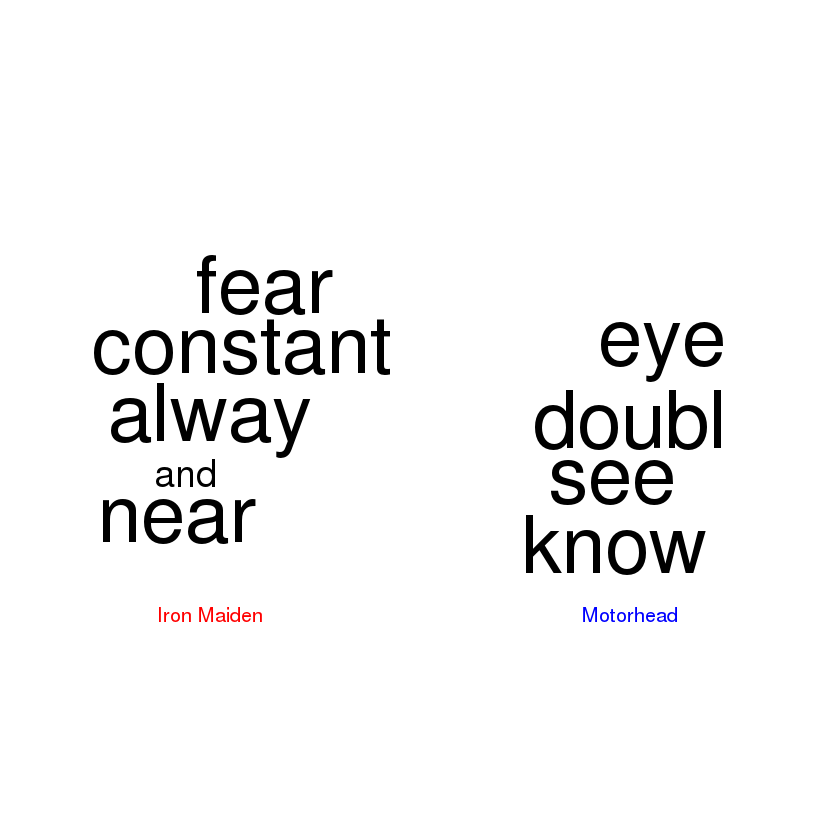

In [69]:
par(mfrow=c(1,2))
wordcloud(rownames(contagem.iron), contagem.iron[,1], min.freq=2)
text(x=0.5, y=0, "Iron Maiden", col="red")
wordcloud(rownames(contagem.motor), contagem.motor[,1], min.freq=2, main="Motorhead")
text(x=0.5, y=0, "Motorhead", col="blue")

In [75]:
HTML("""<video width="320" height="240" controls>
<source src="https://github.com/aruizga7/SelfDrivingCar/raw/master/Project%201/results/white.mp4"></video>""")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected string constant
1: HTML("""<video width="
           ^


In [72]:
video = io.open('/media/[...]/20160706_180451.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
<video controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
</video>'''.format(encoded.decode('ascii')))

ERROR: Error in parse(text = x, srcfile = src): <text>:1:59: unexpected symbol
1: video = io.open('/media/[...]/20160706_180451.mp4', 'r+b').read
                                                              ^


In [ ]:
Adaptado de prof. Marcos V. C. Vital